In [1]:
# Setup environment
# !apt-get -qq install xxd
# !pip3 install pandas numpy matplotlib
# !pip3 install tensorflow==2.13.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import glob
import random

# if tf.test.is_gpu_available():
#     print("GPU is available")
#     # Additional GPU information
#     gpu_devices = tf.config.experimental.list_physical_devices('GPU')
#     print("Available GPU devices:", gpu_devices)
# else:
#     print("GPU is NOT available")

2024-04-05 21:54:35.893129: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
file_path = "6dmg/*"

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = "abcdefghijklmnopqrstuvwxyz"

SAMPLES_PER_GESTURE = 150

NUM_GESTURES = 26

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []
outputs1 = []
file_counts = {chr(i): 0 for i in range(ord('a'), ord('z') + 1)}

datafiles = glob.glob(file_path)
datafiles.sort()
# datafiles.sort()
print("total files", len(datafiles))

for datafile in datafiles:
    out = []
    pos = datafile.rfind("/")
    letter_label = datafile[pos+1]
    try:
        tensor = pd.read_csv(datafile, header=None)
        # print(len(tensor))
        # tensor = tensor[50:-50]
        # print("=>", len(tensor))
        # inputs.append(np.array(tensor.values.ravel()))
        inputs.append(tensor)

        gesture_index = 0
        for i in range(NUM_GESTURES):
            if letter_label == GESTURES[i]:
                gesture_index = i
        output = ONE_HOT_ENCODED_GESTURES[gesture_index]
        outputs.append(output)
        outputs1.append(datafile[pos+1:-4])
        file_counts[GESTURES[gesture_index]] = file_counts[GESTURES[gesture_index]] + 1
        # print ("processed ", datafile, "output=", GESTURES[gesture_index])
    except Exception as e:
        print(f"{e}")
    finally:
        pass

print("total ", len(inputs))
print("total output1", len(outputs1))
# convert the list to numpy arra
# inputs = np.array(inputs)
# outputs = np.array(outputs)

# print("input shape: ", inputs.shape, " output shape", outputs.shape)
# print("Data set parsing and preparation complete.")
print(file_counts)

TensorFlow version = 2.13.0

total files 6501
total  6501
total output1 6501
{'a': 250, 'b': 250, 'c': 250, 'd': 250, 'e': 250, 'f': 250, 'g': 250, 'h': 250, 'i': 250, 'j': 250, 'k': 250, 'l': 250, 'm': 250, 'n': 251, 'o': 250, 'p': 250, 'q': 250, 'r': 250, 's': 250, 't': 250, 'u': 250, 'v': 250, 'w': 250, 'x': 250, 'y': 250, 'z': 250}


In [4]:
# inputs[2]
# df = pd.DataFrame(inputs[0])
# plt.imshow(df, cmap='binary', interpolation='nearest')
# plt.show()

In [5]:
array_list = inputs

# array_list =[]
# for input in inputs:
#     df = pd.DataFrame(input)
#     # plt.scatter(df['x'], -df['y'])
#     # plt.show()
#     mrange=20
#     # print(df.shape)
#     # print(df['x'].describe())
#     # print(df['y'].describe())
#     xmin = min(df['x'])
#     xmax = max(df['x'])
#     ymin = min(df['y'])
#     ymax = max(df['y'])
#     xrange = xmax-xmin
#     yrange = ymax - ymin
#     print(xrange, yrange)
#     if (xrange < mrange):
#         xrange=mrange
#     if yrange<mrange:
#         yrange=mrange
#     a = np.zeros((32, 32))

#     for index, row in df.iterrows():
#         x = int((row[1] - xmin) / xrange *31 ) % 32
#         y = int((row[2] - ymin) / yrange *31 ) % 32
#         a[y][x] = 1

#     array_list.append(a.copy())


# plt.imshow(a, cmap='binary', interpolation='nearest')
# plt.colorbar()
# plt.title('32x32 Array with 0s and 1s')
# plt.show()


# ## 
# num_images = len(array_list)
# num_cols = 16
# num_rows = int(np.ceil(num_images / num_cols))

# print("number of image", num_images, len(outputs1))

# fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, num_rows))

# # Plot each array in the list
# for i, (ax, arr) in enumerate(zip(axs.flat, array_list), 1):
#     ax.imshow(arr, cmap='binary', interpolation='nearest')
#     ax.set_title(f'{outputs1[i-1]}')
#     ax.axis('off')  # Turn off axis labels for better visualization

# # Adjust layout to prevent overlapping titles
# plt.tight_layout()
# plt.show()

In [6]:
# inputs[0]

# drdf

In [7]:

# rows = int(len(inputs) / 10)+1

# # Plot each DataFrame
# fig, axes = plt.subplots(rows, 10, figsize=(25, int(rows * 2.5)))
# axes = axes.flatten()

# for i, df in enumerate(inputs):
#     ax = axes[i]
#     ax.scatter(df['x'], -df['y'],  linewidth=0.2)
#     ax.set_title(f'{outputs1[i]}')
#     # ax.set_xlabel('x')
#     # ax.set_ylabel('y')
#     # ax.legend()
# # # Invert y-axis to match screen coordinates
# # plt.gca().invert_yaxis()

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [8]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087

inputs = np.array(array_list)
outputs = np.array(outputs)
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [9]:
inputs.shape

(6501, 32, 32)

In [10]:
# # build the model and train it

model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            30,
            (2, 2),
            padding="same",
            strides=(1, 1),
            activation="relu",
            input_shape=(32, 32, 1),
        ),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
        # tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(30, (2,2), padding='same', strides=(2,2) ,activation="relu"),
        tf.keras.layers.Conv2D(30, (2,2), padding='same', strides=(2,2) ,activation="relu"),
        # tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
        tf.keras.layers.Dropout(0.1),
        # tf.keras.layers.Flatten(input_shape=(32, 32)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(60, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(80, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(26, activation="softmax"),
    ]
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 30)        150       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 30)          3630      
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 30)          3630      
                                                                 
 dropout (Dropout)           (None, 4, 4, 30)          0         
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                        

In [11]:
# # build the model and train it

# model = tf.keras.Sequential(
#     [
#     # tf.keras.layers.Conv1D(filters=500, kernel_size=3, padding='same', strides=3, activation="relu",input_shape=(SAMPLES_PER_GESTURE, 9)),
#     # tf.keras.layers.MaxPooling1D(pool_size=2),
#     tf.keras.layers.LSTM(units=100, input_shape=(SAMPLES_PER_GESTURE, 9), return_sequences=False),
#     # tf.keras.layers.Conv2D(25, (1,3), padding='same', strides=(1,3) ,activation="relu"),
#     # tf.keras.layers.MaxPooling2D((2, 2), strides=(2,1)),


#     # tf.keras.layers.GlobalMaxPooling1D(),
#     # tf.keras.layers.Dense(58, activation="relu"),
#     # tf.keras.layers.Dropout(0.1),
#     # tf.keras.layers.Dense(55, activation="relu"),
#     # tf.keras.layers.Dropout(0.1),    
#     tf.keras.layers.Dense(26, activation="softmax")
# ]
# )
# print(model.summary())


In [12]:
# model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(inputs_train, outputs_train, epochs=100, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/100
3900/3900 [==============================] - 11s 2ms/step - loss: 1.5601 - accuracy: 0.5208 - val_loss: 0.7741 - val_accuracy: 0.7425
Epoch 2/100
3900/3900 [==============================] - 11s 3ms/step - loss: 0.7787 - accuracy: 0.7521 - val_loss: 0.5290 - val_accuracy: 0.8478
Epoch 3/100
3900/3900 [==============================] - 9s 2ms/step - loss: 0.6092 - accuracy: 0.8059 - val_loss: 0.4570 - val_accuracy: 0.8624
Epoch 4/100
3900/3900 [==============================] - 8s 2ms/step - loss: 0.4955 - accuracy: 0.8349 - val_loss: 0.5211 - val_accuracy: 0.8417
Epoch 5/100
3900/3900 [==============================] - 11s 3ms/step - loss: 0.4165 - accuracy: 0.8615 - val_loss: 0.4211 - val_accuracy: 0.8778
Epoch 6/100
3900/3900 [==============================] - 9s 2ms/step - loss: 0.3846 - accuracy: 0.8677 - val_loss: 0.3823 - val_accuracy: 0.8901
Epoch 7/100
3900/3900 [==============================] - 9s 2ms/step - loss: 0.3377 - accuracy: 0.8903 - val_loss: 0.3834 - val

In [13]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Bidirectional, LSTM, Dense
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import SparseCategoricalCrossentropy

# # Assuming you have your input data and labels
# # Replace X_train and y_train with your actual data and labels
# X_train = np.random.rand(7911, 150, 9)
# y_train = np.random.randint(0, 26, size=(7911, 26))

# print (X_train.shape)
# print (y_train.shape)
# print (y_train[0])
# # Define the model
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(150, 9)))
# model.add(Dense(units=26, activation='softmax'))

# # Compile the model
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])


# # Train the model
# batch_size = 32
# epochs = 10
# print(model.summary())
# model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


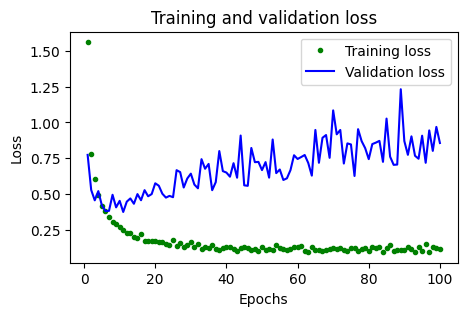

[5.0, 3.0]


In [14]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (5,3)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

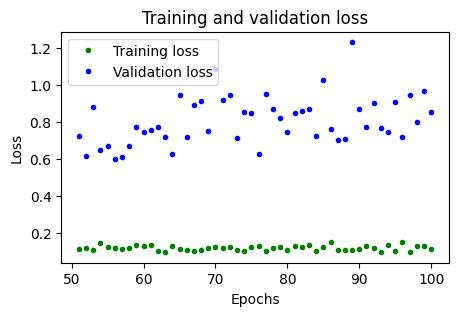

In [15]:
# graph the loss again skipping a bit of the start
SKIP = 50
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# graph of mean absolute error
# mae = history.history['mae']
# val_mae = history.history['val_mae']
# plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
# plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
# plt.title('Training and validation mean absolute error')
# plt.xlabel('Epochs')
# plt.ylabel('MAE')
# plt.legend()
# plt.show()


In [17]:
print("input shape" , inputs_test.shape)
print(type(inputs_test))
# print (len(data1))
# inputs_test = np.concatenate((inputs_test, [np.array(data1)]), axis=0)
# print("input shape" , inputs_test.shape)

input shape (1300, 32, 32)
<class 'numpy.ndarray'>


In [18]:
# t1 = pd.read_csv("processed_data/a_1.dat")
# print(t1)
# single_sample = np.array(t1.values.ravel())
# single_sample1 = (t1.melt().value.tolist())
# print(type(single_sample))
# prediction = model.predict(np.expand_dims(single_sample, axis=0))
# prediction1 = model.predict(np.expand_dims(single_sample1, axis=0))

# formatted_numbers = ["{:.2f}".format(number) for number in prediction[0]]

# print("Formatted Numbers:", formatted_numbers)
# print("Prediction:", prediction)
# prediction = model.predict([t1])
# print("predictions =\n", np.round(prediction, decimals=3))
# print(single_sample)
# print(single_sample1)

In [19]:
# t1 = pd.read_csv("processed_data/a_1.dat")
# [np.array(t1.values.ravel())]

# inputs_test = np.concatenate((inputs_test, [np.array(t1.values.ravel())]), axis=0)
# # 

In [20]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)
print("pred shape" , predictions.shape)
# predictions = model.predict(inputs_test[0].reshape(1,1248))
# print(predictions[0])
# print(outputs_test[0])
# print (inputs_test[0])

# pd.DataFrame(inputs_test[0]).to_csv("test1.h", sep=',', encoding='utf-8', index=False, header=False)
# !echo "const unsigned char tt[] = {" > ./tt.h
# !cat "test1.csv" | xxd -i      >> ./tt.h
# !echo "};"                              >> ./tt.h

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))

print("actual =\n", outputs_test)
a = np.round(predictions - outputs_test, decimals=0)
print(a)
# Plot the predictions along with to the test data
# plt.clf()
# plt.title('Training data predicted vs actual values')
# plt.plot( outputs_test, 'b.', label='Actual')
# plt.plot( predictions, 'r.', label='Predicted')
# plt.show()


41/41 [==============================] - 0s 4ms/step
pred shape (1300, 26)
predictions =
 [[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.016 0.    0.    ... 0.077 0.01  0.035]
 ...
 [0.999 0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.003 0.006 0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]
actual =
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [-0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [21]:
print(outputs_test[:, 0].dtype)
print(predictions[:, 0].dtype)

float64
float32


In [22]:
pre = (predictions + 0.5).astype(int)
# pre
a = pre-outputs_test
print(a.shape)
tests_by_letter = outputs_test.astype(bool).sum(axis=0)
print("tests by letter: ", tests_by_letter)
wrong_predict_by_letter = a.astype(bool).sum(axis=0)
print("wrong predict by letter: ", wrong_predict_by_letter)
print("wrong rate: ", np.round(wrong_predict_by_letter/tests_by_letter, decimals=2))

(1300, 26)
tests by letter:  [57 41 59 47 51 52 47 51 53 50 60 51 55 51 54 51 49 55 45 46 58 44 49 36
 46 42]
wrong predict by letter:  [24  8  8 21 10 16  5 15  4  9 25  2 16 17 12 27  3 13  5 14  6  6  8  4
 13  4]
wrong rate:  [0.42 0.2  0.14 0.45 0.2  0.31 0.11 0.29 0.08 0.18 0.42 0.04 0.29 0.33
 0.22 0.53 0.06 0.24 0.11 0.3  0.1  0.14 0.16 0.11 0.28 0.1 ]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# accuracy = accuracy_score(outputs_test, predictions)
# precision = precision_score(outputs_test, predictions)
# recall = recall_score(outputs_test, predictions)
# f1 = f1_score(outputs_test, predictions)
# conf_matrix = confusion_matrix(outputs_test, predictions)

# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1-Score: {f1}")
# print(f"Confusion Matrix:\n{conf_matrix}")
# Initialize an array to store accuracy for each class

# class_accuracies = []

# # Iterate over each class (assuming axis 1 represents classes)
# for class_index in range(26):
#     true_labels_class = outputs_test[:, class_index]
#     predicted_labels_class = pre[:, class_index]
#     accuracy = accuracy_score(true_labels_class, predicted_labels_class)
#     class_accuracies.append(accuracy)

# # Calculate micro-average accuracy (overall accuracy)
# micro_average_accuracy = accuracy_score(outputs_test, predictions)

# # Calculate macro-average accuracy (average accuracy across classes)
# macro_average_accuracy = sum(class_accuracies) / len(class_accuracies)

# # Print individual class accuracies and the macro/micro averages
# for class_index, accuracy in enumerate(class_accuracies):
#     print(f"Class {class_index}: Accuracy = {accuracy}")

# print(f"Micro-average accuracy: {micro_average_accuracy}")
# print(f"Macro-average accuracy: {macro_average_accuracy}")
# In the code above:

# We iterate over each class, treating it as a binary classification problem by selecting the true labels and predicted labels for that class.
# We calculate the accuracy for each class separately and store it in the class_accuracies list.
# We compute the micro-average accuracy, which is the overall accuracy across all samples and classes.
# We compute the macro-average accuracy, which is the average accuracy across all classes.
# This approach allows you to evaluate the performance of your multi-class classification model for each individual class and provides overall accuracy metrics as well.







In [24]:
# import matplotlib.pyplot as plt

# plt.scatter(outputs_test, predictions)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.show()

from sklearn.metrics import r2_score


r2 = r2_score(outputs_test, predictions)
print("r2=", r2)

r2= 0.8039465326522734


In [25]:
outputs_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
(predictions[0]+0.5).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [27]:
# tf.saved_model.save(model, 'my_saved_model')

In [28]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)
  
  

INFO:tensorflow:Assets written to: /var/folders/37/t8fhr8j953xfnbs16xcvwq3w0000gn/T/tmpqn3gmb8c/assets


INFO:tensorflow:Assets written to: /var/folders/37/t8fhr8j953xfnbs16xcvwq3w0000gn/T/tmpqn3gmb8c/assets


Model is 177168 bytes


2024-04-05 22:11:25.694191: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-04-05 22:11:25.694212: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-04-05 22:11:25.695189: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/37/t8fhr8j953xfnbs16xcvwq3w0000gn/T/tmpqn3gmb8c
2024-04-05 22:11:25.698013: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-04-05 22:11:25.698030: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/37/t8fhr8j953xfnbs16xcvwq3w0000gn/T/tmpqn3gmb8c
2024-04-05 22:11:25.704443: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-04-05 22:11:25.707128: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-04-05 22:11:25.800285: I tensorflow/cc/saved_model/loader.

In [29]:
# Create a TensorFlow Lite interpreter for the converted model
# interpreter = tf.lite.Interpreter(model_content=tflite_model)
# interpreter.allocate_tensors()

# # Get the details of the TensorFlow Lite model
# ops_details = interpreter.get_tensor_details()

# # Print the details of each operator in the TensorFlow Lite model
# for op in ops_details:
#     print("Operator Name:", op['name'])
#     print("Operator Index:", op['index'])
#     print("Operator Shape:", op['shape'])
#     print("Operator Type:", op['dtype'])
#     print()

In [30]:
!echo "const unsigned char model[] = {" > ./content/model.h
!cat gesture_model.tflite | xxd -i      >> ./content/model.h
!echo "};"                              >> ./content/model.h

import os
model_h_size = os.path.getsize("./content/model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 1,092,570 bytes.


In [31]:
from sklearn.metrics import f1_score

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
# f1 = f1_score(outputs_test, pre)

In [32]:


# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])